<a href="https://colab.research.google.com/github/limdiny/ML/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀
* 로지스틱 회귀

선형방정식을 사용한 분류 알고리즘이다. 시그모이드 함수나 소프트맥스 함수를 사용하여 클래스 확률을 출력할 수 있다.

![](https://images.velog.io/images/oooops/post/358709b4-8a9c-4647-ae5c-0872cc141546/image.png)

* 다중 분류

타깃 클래스가 2개 이상인 분류문제이다. 로지스틱 회귀는 다중 분류를 위해 소프트맥스 함수를 사용하여 클래스를 예측한다.

* 시그모이드 함수

이진분류를 위해 사용하고, 선형방정식의 출력을 0~1 사이의 값으로 압축한다.

* 소프트맥스 함수

다중분류를 위해 사용하고, 여러 선형 방정식의 출력 결과를 정규화하여 합이 1이 되도록 만든다.

* LogisticRegression

선형 분류 알고리즘인 로지스틱 회귀를 위한 클래스이다.

* predict_proba()

예측 확률을 반환한다.

* decision_function()

모델이 학습한 선형 방정식의 출력을 반환한다.

이진 분류일 경우 양성클래스의 확률이 반환된다.

다중 분류일 경우 각 클래스마다 선형방정식을 계산해서 가장 큰 값의 클래스가 예측 클래스가  된다.

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


* pd.unique()를 사용하여 species의 고유한 값들을 출력한다(일종의 set 개념?)
* 총  7개의 종이 있다. 

In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()


* input과 target을 numpy배열로 저장해줌

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

* 데이터 분리와 데이터들의 정규화를 시켜줌

# 1. k 최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

print(kn.classes_)

0.8907563025210085
0.85
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


* KNEighborsClassifier에 정렬된 타깃값은 class_의 속성에 저장되있음
* print(pd.unique(fish['Species'])) 로 출력했던 순서와 달리 알파벳정렬이 되있음



In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


* 처음 5개 샘플에 대한 타깃값 예측

In [ ]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


* predict_proba 를 사용하여 각 클래스별 확률을 보여준다.
* 행:5개의 샘플 / 열: 각각의 클래스
* np.round(proba,decimals=4) 소수점 아래 5번째에서 반올림하여 4번째자리까지 표기한다.

In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


**잠깐 !!**
* n_neighbors=3 으로 3개의 최근접이웃을 사용하면 확률이 0, 1/3, 2/3, 1 밖에 안나옴
* 연속적인 확률을 표기하기위해 로지스틱 회귀를 사용함

# 2. 로지스틱 회귀 (이진분류)

* 이름은 회귀지만 분류할 때 사용

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

* bream_smelt_indexes 배열은 도미와 빙어일 경우 true이고, 그 외 모두 false의 값이 들어있다.
* bream_smelt_indexes 의 배열을 사용해서 train_scaled와 train_target 에서 도미와 빙어만 골라낼 수 있다.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)

LogisticRegression()

In [ ]:
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


* 첫번째 열 : 음성클래스에 대한 비율(bream)
* 두번째 열 : 양성클래스에 대한 비율(smelt)




In [ ]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


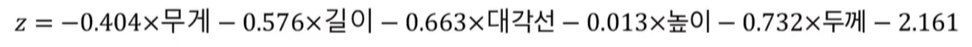

In [ ]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


* train_bream_smelt 의 5개 샘플의 z값

In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


*  사이파이 라이브러리에서 시그모이드함수를 불러와 z값을 넣으면 그에 대한 확률로 변환된다.
* 출력된 값을 보면 predict_proba의 두번째열의 확률과 동일하다
* decision_function()은 양성클래스에 대한 z값을 반환하는 것이다.

# 3. 로지스틱 회귀 (다중분류)

In [ ]:
lr=LogisticRegression(C=20,max_iter=1000)
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


* 로지스틱회귀는 기본적으로 반복적인 알고리즘을 사용한다(max_iter로 조절)
* 로지스틱회귀에서 규제를 제어하는 매개변수는 C(작을수록 규제가 커짐)

In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.predict(test_scaled[:5]))
proba=lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


* 5개 샘플에 대한 예측(행)
* 7개 생선에 대한 확률(열)

* K최근접이웃에서는 확률이 0, 1/3, 2/3, 1  이산적)

* 로지스틱회귀 이중분류에서는 도미와 빙어에 대한 확률만 출력)

In [ ]:
print(lr.coef_,lr.intercept_)
print(lr.coef_.shape,lr.intercept_.shape)

[[-1.49002911 -1.02919221  2.59351113  7.70354318 -1.20068079]
 [ 0.19619256 -2.0106062  -3.77982687  6.50490143 -1.99486463]
 [ 3.56278472  6.34361428 -8.48973364 -5.75756295  3.79309039]
 [-0.10458533  3.60316654  3.93067417 -3.61731229 -1.75070607]
 [-1.40059104 -6.07505264  5.25967743 -0.87222909  1.86043657]
 [-1.38528628  1.49217379  1.3922839  -5.67732641 -4.40095877]
 [ 0.62151448 -2.32410356 -0.90658611  1.71598614  3.69368329]] [-0.09204845 -0.26290731  3.25101057 -0.14742485  2.65496057 -6.78780765
  1.38421712]
(7, 5) (7,)


* 다중분류는 클래스마다 z값을 계산함


In [ ]:
decisions=lr.decision_function(test_scaled[:5])
print(np.round(decisions,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
from scipy.special import softmax
proba=softmax(decisions,axis=1)
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


* 이진분류는 시그모이드함수를 사용하고,다중분류는 소프트맥스함수를 사용해서 z값을 변환한다.
* axis=1 로 지정해서 각 행에 대해 소프트맥스를 계산한다.
